## K-Means Clustering

#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Data Preprocessing

In [2]:
dataset = pd.read_csv('MallCustomers.csv')
X = dataset.iloc[:, [3, 4]].values

#### Elbow Method

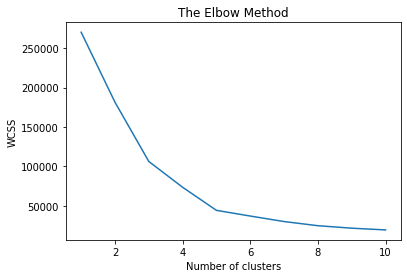

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K-Means Clustering

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#### Clusters Visualization

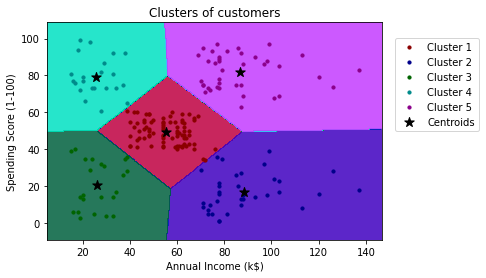

In [5]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cmap = LinearSegmentedColormap.from_list('', colors)
X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 10, stop = X[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X[:, 1].min() - 10, stop = X[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, kmeans.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.85, cmap = cmap)
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s = 10, c = 'dark' + colors[i], label = f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 100, c = 'black', marker = '*', label = 'Centroids')
plt.xlim(X1.min(), X1.max())
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = (1.04, 0.5))
plt.show()